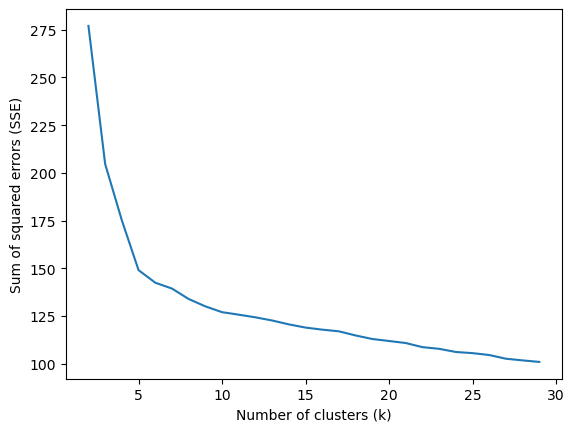

New types:


Type: New type 0


  Instance: http://data.semanticweb.org/organization/university-of-washington


  Properties:


    uri: http://data.semanticweb.org/organization/university-of-washington
    http://www.w3.org/1999/02/22-rdf-syntax-ns#type: http://xmlns.com/foaf/0.1/Organization
    name: University of Washington
    http://xmlns.com/foaf/0.1/name: University of Washington
    http://www.w3.org/2000/01/rdf-schema#label: University of Washington
    http://xmlns.com/foaf/0.1/member: http://data.semanticweb.org/person/joseph-t-tennis


  Instance: http://data.semanticweb.org/organization/syracuse-university


  Properties:


    uri: http://data.semanticweb.org/organization/syracuse-university
    http://xmlns.com/foaf/0.1/member: http://data.semanticweb.org/person/jian-qin
    name: Syracuse University
    http://xmlns.com/foaf/0.1/name: Syracuse University
    http://www.w3.org/2000/01/rdf-schema#label: Syracuse University
    http://www.w3.org/1999/02/22-rdf-syntax-ns#t

In [2]:
from rdflib import Graph, URIRef
from rdflib.namespace import RDF
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


g = Graph()
g.parse("kenza_conference.rdf", format="nt")
query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    SELECT ?type ?instance ?property ?value ?name
    WHERE {
        ?instance rdf:type ?type .
        ?instance ?property ?value .
        OPTIONAL { ?instance <http://xmlns.com/foaf/0.1/name> ?name }
    }
"""

results = g.query(query)
instances = []
for row in results:
    instance = row[1]
    property = row[2]
    value = row[3]
    name = row[4]

    instance_dict = next((d for d in instances if d["uri"] == instance), None)
    if instance_dict is None:
        instance_dict = {"uri": instance}
        instances.append(instance_dict)
    instance_dict[property] = value
    if name:
        instance_dict["name"] = name

vectorizer = DictVectorizer()
X = vectorizer.fit_transform(instances)
similarity_matrix = cosine_similarity(X)

sse = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(similarity_matrix)
    sse_k = kmeans.inertia_
    sse.append(sse_k)
    
plt.plot(range(2, 30), sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared errors (SSE)")
plt.show()    

kmeans = KMeans(n_clusters=20)
kmeans.fit(similarity_matrix)


print("New types:")
print('\n')
for label in range(kmeans.n_clusters):
    cluster_instances = [instances[i] for i, l in enumerate(kmeans.labels_) if l == label]
    print(f"Type: New type {label}")
    print('\n')
    for instance in cluster_instances:
        print(f"  Instance: {instance['uri']}")
        print('\n')
        print("  Properties:")
        print('\n')
        for property, value in instance.items():
            print(f"    {property}: {value}")
        print('\n')

        
for i, instance in enumerate(instances):
    instance["cluster"] = kmeans.labels_[i]
    print(f"Instance {instance['uri']} is in cluster {instance['cluster']}")
    print('\n')
    print("Properties:")
    print('\n')
    for property, value in instance.items():
        print(f"    {property}: {value}")
    print('\n')

    types = {}
for instance in instances:
    type = instance.get("type")
    if type:
        if type not in types:
            types[type] = []
        types[type].append(instance)


In [1]:
from rdflib import Graph, URIRef
from rdflib.namespace import RDF

# Nτριπλέτες
g = Graph()
g.parse("kenza_conference.rdf", format="nt")
# Ορισμος SPARQL 
query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    SELECT ?type ?instance ?property ?value ?name
    WHERE {
        ?instance rdf:type ?type .
        ?instance ?property ?value .
        OPTIONAL { ?instance <http://xmlns.com/foaf/0.1/name> ?name }
    }
"""

results = g.query(query)

# αποθηκευση αποτελέσμάτων σε λεξικο με ολες τις λεπτομέρειες
instances_by_type = {}
for row in results:
    type = row[0]
    instance = row[1]
    property = row[2]
    value = row[3]
    name = row[4]

    if type not in instances_by_type:
        instances_by_type[type] = {}

    if instance not in instances_by_type[type]:
        instances_by_type[type][instance] = {}

    instances_by_type[type][instance][property] = value

    if name:
        instances_by_type[type][instance]["name"] = name

for type, instances in instances_by_type.items():
    print(f"Type: {type}")
    print('\n')
    print('\n')

    for instance, properties in instances.items():
        name = properties.get("name")
        if name:
            print(f"  Instance: {name}")
        else:
            print(f"  Instance: {instance}")
        print('\n')

        for property, value in properties.items():
            property_ref = URIRef(property)
            property_name = property_ref.split("#")[-1]
            print(f"    Property: {property_name}, Value: {value}")
            print('\n')

Type: http://data.semanticweb.org/ns/swc/ontology#Presentation




  Instance: http://data.semanticweb.org/conference/dc/2010/tutorial/4/tutorial-presenter


    Property: isRoleAt, Value: http://data.semanticweb.org/conference/dc/2010/tutorial/4


    Property: type, Value: http://data.semanticweb.org/ns/swc/ontology#Presentation


    Property: label, Value: Tutorial Presenter


    Property: heldBy, Value: http://data.semanticweb.org/person/ron-daniel


  Instance: http://data.semanticweb.org/conference/dc/2010/tutorial/2/tutorial-presenter


    Property: type, Value: http://data.semanticweb.org/ns/swc/ontology#Presentation


    Property: label, Value: Tutorial Presenter


    Property: heldBy, Value: http://data.semanticweb.org/person/jon-phipps


    Property: isRoleAt, Value: http://data.semanticweb.org/conference/dc/2010/tutorial/2


  Instance: http://data.semanticweb.org/conference/dc/2010/tutorial/3/tutorial-presenter


    Property: type, Value: http://data.semanticweb.org